<a href="https://colab.research.google.com/github/jigarbhalsod/ML-Launch/blob/main/21Sept2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# SERIES

In [ ]:
mydata = ['Boat', 'Car', 'Bike', 'Truck']

myseries1 = pd.Series(mydata)
print(myseries1)

0     Boat
1      Car
2     Bike
3    Truck
dtype: object


In [ ]:
mydata = [1, 55, 99, 43]
myseries2 = pd.Series(mydata)
print(myseries2)

0     1
1    55
2    99
3    43
dtype: int64


# DATAFRAME

In [ ]:
mydfdata = [('Boat', 1), ('Car', 55), ('Bike',99), ('Truck', 43)]

mydf = pd.DataFrame(mydfdata, columns=['thing', 'count'])

print(mydf,'\n')
print(mydf.dtypes)

   thing  count
0   Boat      1
1    Car     55
2   Bike     99
3  Truck     43 

thing    object
count     int64
dtype: object


# READING THE DATA

In [ ]:
df = pd.read_csv('crocodile_dataset.csv')

# INSPECTION OF THE DATA

In [ ]:
df.head()
# df.tail()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [ ]:
df.dtypes

,0
Observation ID,int64
Common Name,object
Scientific Name,object
Family,object
Genus,object
Observed Length (m),float64
Observed Weight (kg),float64
Age Class,object
Sex,object
Date of Observation,object


In [ ]:
df.describe()

,Observation ID,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900
std,288.819436,1.097542,175.186788
min,1.000000,0.140000,4.400000
25%,250.750000,1.637500,53.225000
50%,500.500000,2.430000,100.600000
75%,750.250000,3.010000,168.875000
max,1000.000000,6.120000,1139.700000


# COLUMNS AND ROWS

In [ ]:
df['Genus']

,Genus
0,Crocodylus
1,Crocodylus
2,Crocodylus
3,Crocodylus
4,Crocodylus
...,...
995,Crocodylus
996,Crocodylus
997,Mecistops
998,Mecistops


In [ ]:
df.loc[4]

,4
Observation ID,5
Common Name,Mugger Crocodile (Marsh Crocodile)
Scientific Name,Crocodylus palustris
Family,Crocodylidae
Genus,Crocodylus
Observed Length (m),3.75
Observed Weight (kg),269.4
Age Class,Adult
Sex,Unknown
Date of Observation,15-07-2019


This helps when you want to look up rows by that ID or join/merge on it.<br>
The original column 'Observation ID' is removed from regular columns and becomes the index.

In [ ]:
df = df.set_index('Observation ID')

# Subsetting Data

In [ ]:
df.shape

(1000, 14)

In [ ]:
df_subset1 = df.loc[df['Observed Weight (kg)'] > 100, ['Country/Region', 'Observer Name']]
print(df_subset1)

                  Country/Region          Observer Name
Observation ID                                         
2                      Venezuela           Brandon Hall
3                      Venezuela       Melissa Peterson
5                          India            Donald Reid
6                          India            Randy Brown
7                       Thailand  Dr. Marvin Thomas Jr.
...                          ...                    ...
991             Papua New Guinea            Casey Miles
992                        Egypt         Deborah Moreno
995                    Guatemala            Seth Norman
996                   Mauritania            Karen Avery
999                 Sierra Leone          Eric Petersen

[504 rows x 2 columns]


In [ ]:
df_subset2 = df.query('`Observed Weight (kg)` > 100')
print(df_subset2[['Country/Region', 'Observer Name']])

                  Country/Region          Observer Name
Observation ID                                         
2                      Venezuela           Brandon Hall
3                      Venezuela       Melissa Peterson
5                          India            Donald Reid
6                          India            Randy Brown
7                       Thailand  Dr. Marvin Thomas Jr.
...                          ...                    ...
991             Papua New Guinea            Casey Miles
992                        Egypt         Deborah Moreno
995                    Guatemala            Seth Norman
996                   Mauritania            Karen Avery
999                 Sierra Leone          Eric Petersen

[504 rows x 2 columns]


In [ ]:
df = df.loc[~df['Observed Weight (kg)'].isna()]
print(df[['Country/Region', 'Observer Name']])

                  Country/Region     Observer Name
Observation ID                                    
1                         Belize      Allison Hill
2                      Venezuela      Brandon Hall
3                      Venezuela  Melissa Peterson
4                         Mexico     Edward Fuller
5                          India       Donald Reid
...                          ...               ...
996                   Mauritania       Karen Avery
997             Papua New Guinea     Sylvia Turner
998                Côte d'Ivoire   Kristin Fleming
999                 Sierra Leone     Eric Petersen
1000            Papua New Guinea    Kristen Harris

[1000 rows x 2 columns]




*   df['Observed Weight (kg)'].isna() → True where the value is NaN (missing).

*   ~ → logical NOT, so it flips the boolean mask.

*   df.loc[...] → keeps only the rows where weight is NOT NaN.

# Casting dtypes
**any other time**

In [ ]:
df0 = df.dropna()
df['Observed Length (m)'] = df['Observed Length (m)'].astype(int)
df['Observed Weight (kg)'] = df['Observed Weight (kg)'].astype(int)
print(df0)

                                           Common Name  \
Observation ID                                           
1                                  Morelet's Crocodile   
2                                   American Crocodile   
3                                    Orinoco Crocodile   
4                                  Morelet's Crocodile   
5                   Mugger Crocodile (Marsh Crocodile)   
...                                                ...   
996                             West African Crocodile   
997                        Hall's New Guinea Crocodile   
998             West African Slender-snouted Crocodile   
999             West African Slender-snouted Crocodile   
1000                       Hall's New Guinea Crocodile   

                       Scientific Name        Family       Genus  \
Observation ID                                                     
1                 Crocodylus moreletii  Crocodylidae  Crocodylus   
2                    Crocodylus acutus  C

# Creating new column

In [ ]:
df['BMI'] = df['Observed Weight (kg)'] / df['Observed Length (m)']
print(df[['BMI','Observed Weight (kg)','Observed Length (m)']])

                       BMI  Observed Weight (kg)  Observed Length (m)
Observation ID                                                       
1                62.000000                    62                    1
2                83.500000                   334                    4
3               118.000000                   118                    1
4                45.000000                    90                    2
5                89.666667                   269                    3
...                    ...                   ...                  ...
996              56.000000                   112                    2
997              40.000000                    80                    2
998              46.500000                    93                    2
999              73.500000                   147                    2
1000             47.000000                    47                    1

[1000 rows x 3 columns]


In [ ]:
import matplotlib.pylab as plt
plt.style.use('ggplot')

<Axes: title={'center': 'Distribution of Observed Weight (kg)'}, ylabel='Frequency'>

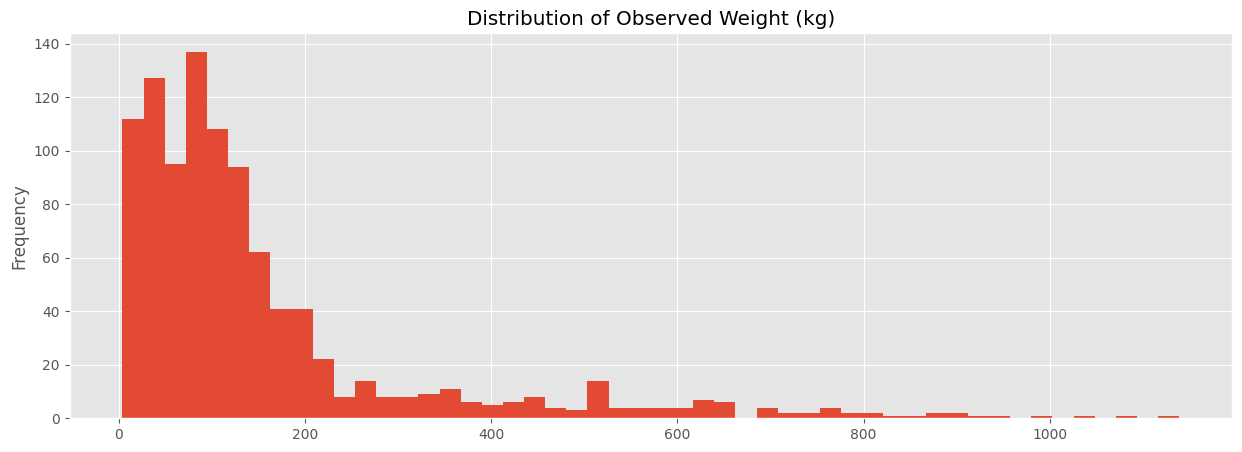

In [ ]:
df['Observed Weight (kg)'].plot(kind='hist', bins=50,
                     title='Distribution of Observed Weight (kg)',
                     figsize=(15, 5))

<Axes: title={'center': 'Weight vs Length Count'}, xlabel='Observed Weight (kg)', ylabel='Observed Length (m)'>

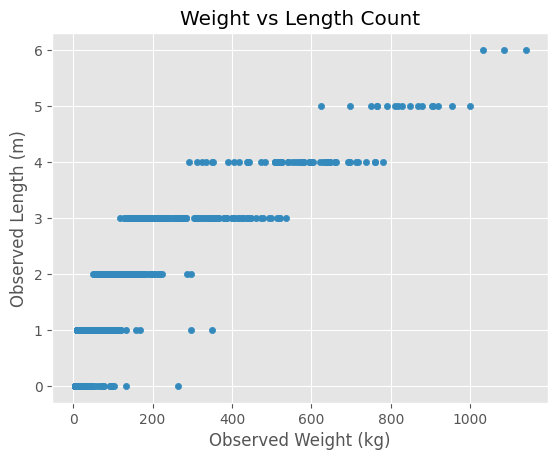

In [ ]:
df.plot(kind='scatter', x='Observed Weight (kg)', y='Observed Length (m)', title='Weight vs Length Count')